# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Data Preprocessing and Analysis

In [2]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Then the datasets are loaded

In [13]:
data = pd.read_csv('C:/Users/DELL/Downloads/GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-09,136.949005,138.321503,136.428757,138.001999,138.001999,12374000
1,2021-08-10,138.079498,138.551498,137.226501,138.096497,138.096497,16034000
2,2021-08-11,138.283005,138.847748,137.350006,137.689499,137.689499,15204000
3,2021-08-12,137.712997,138.417999,136.779007,138.389496,138.389496,14646000
4,2021-08-13,138.357498,138.673996,138.005005,138.406006,138.406006,12580000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [15]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,132.350554,133.911013,130.741720,132.296544,132.296544,2.723707e+07
std,13.246447,12.873224,13.295921,13.058185,13.058185,1.050492e+07
min,105.141998,106.394997,102.208000,105.440002,105.440002,1.237400e+07
25%,117.469378,119.414623,116.213373,118.200001,118.200001,1.951850e+07
50%,136.943756,138.227371,135.428001,136.757248,136.757248,2.513300e+07
75%,143.223629,144.311378,141.736626,142.803746,142.803746,3.220250e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


In [16]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Filling null columns with mean values....

In [17]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_3104/2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-09,136.949005,138.321503,136.428757,138.001999,138.001999,12374000
1,2021-08-10,138.079498,138.551498,137.226501,138.096497,138.096497,16034000
2,2021-08-11,138.283005,138.847748,137.350006,137.689499,137.689499,15204000
3,2021-08-12,137.712997,138.417999,136.779007,138.389496,138.389496,14646000
4,2021-08-13,138.357498,138.673996,138.005005,138.406006,138.406006,12580000


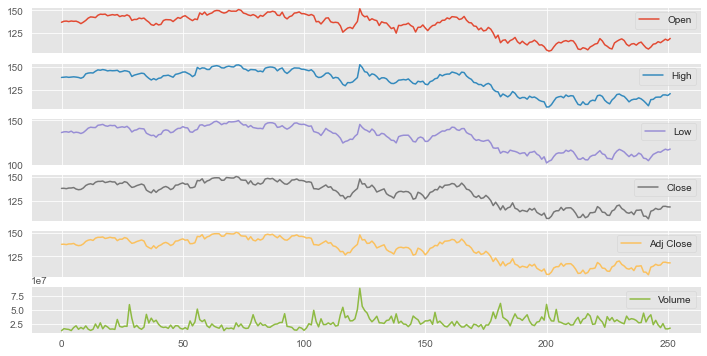

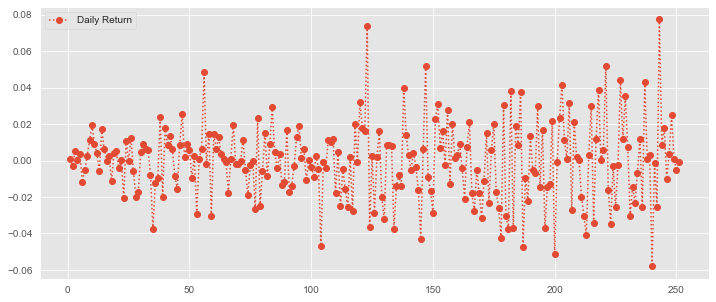

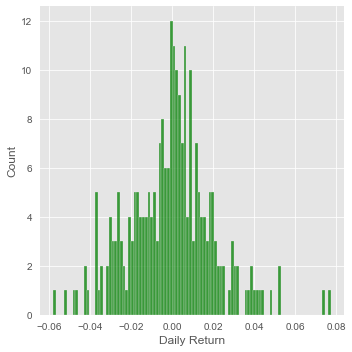

C:\Users\DELL\AppData\Local\Temp/ipykernel_3104/2438974047.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


           Date        Open        High         Low       Close   Adj Close  \
0    2021-08-09  136.949005  138.321503  136.428757  138.001999  138.001999   
1    2021-08-10  138.079498  138.551498  137.226501  138.096497  138.096497   
2    2021-08-11  138.283005  138.847748  137.350006  137.689499  137.689499   
3    2021-08-12  137.712997  138.417999  136.779007  138.389496  138.389496   
4    2021-08-13  138.357498  138.673996  138.005005  138.406006  138.406006   
..          ...         ...         ...         ...         ...         ...   
247  2022-08-02  114.430000  117.080002  114.260002  115.900002  115.900002   
248  2022-08-03  116.339996  119.419998  116.150002  118.779999  118.779999   
249  2022-08-04  118.300003  119.500000  117.709999  118.870003  118.870003   
250  2022-08-05  116.930000  118.860001  116.709999  118.220001  118.220001   
251  2022-08-08  119.120003  120.860001  117.830002  118.139999  118.139999   

       Volume  MA for 10 days  MA for 50 days  MA f

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

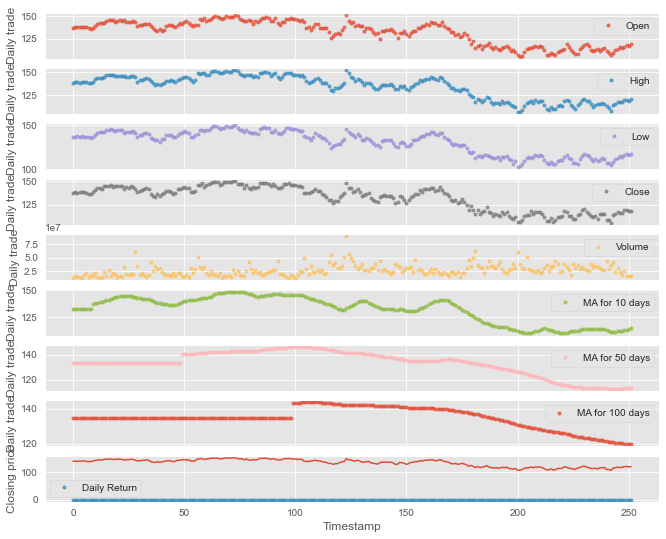

In [18]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

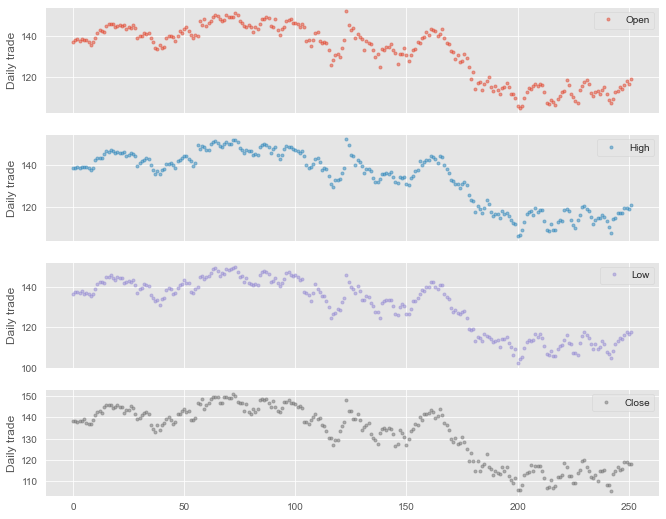

In [19]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

           Date        Open        High         Low       Close   Adj Close  \
0    2021-08-09  136.949005  138.321503  136.428757  138.001999  138.001999   
1    2021-08-10  138.079498  138.551498  137.226501  138.096497  138.096497   
2    2021-08-11  138.283005  138.847748  137.350006  137.689499  137.689499   
3    2021-08-12  137.712997  138.417999  136.779007  138.389496  138.389496   
4    2021-08-13  138.357498  138.673996  138.005005  138.406006  138.406006   
..          ...         ...         ...         ...         ...         ...   
247  2022-08-02  114.430000  117.080002  114.260002  115.900002  115.900002   
248  2022-08-03  116.339996  119.419998  116.150002  118.779999  118.779999   
249  2022-08-04  118.300003  119.500000  117.709999  118.870003  118.870003   
250  2022-08-05  116.930000  118.860001  116.709999  118.220001  118.220001   
251  2022-08-08  119.120003  120.860001  117.830002  118.139999  118.139999   

       Volume  MA for 10 days  MA for 50 days  MA f

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.323506e+02,1.324645e+01,1.051420e+02,1.174694e+02,1.369438e+02,1.432236e+02,1.518635e+02
High,252.0,1.339110e+02,1.287322e+01,1.063950e+02,1.194146e+02,1.382274e+02,1.443114e+02,1.521000e+02
Low,252.0,1.307417e+02,1.329592e+01,1.022080e+02,1.162134e+02,1.354280e+02,1.417366e+02,1.498875e+02
Close,252.0,1.322965e+02,1.305819e+01,1.054400e+02,1.182000e+02,1.367572e+02,1.428037e+02,1.507090e+02
Adj Close,252.0,1.322965e+02,1.305819e+01,1.054400e+02,1.182000e+02,1.367572e+02,1.428037e+02,1.507090e+02
Volume,252.0,2.723707e+07,1.050492e+07,1.237400e+07,1.951850e+07,2.513300e+07,3.220250e+07,8.975000e+07
MA for 10 days,252.0,1.324645e+02,1.250439e+01,1.102042e+02,1.179881e+02,1.366083e+02,1.424574e+02,1.489807e+02
MA for 50 days,252.0,1.334830e+02,9.946848e+00,1.125377e+02,1.307945e+02,1.347152e+02,1.416382e+02,1.461839e+02
MA for 100 days,252.0,1.347678e+02,6.181307e+00,1.196823e+02,1.347059e+02,1.347678e+02,1.400621e+02,1.435536e+02
Daily Return,252.0,-4.040489e-04,2.075605e-02,-5.806676e-02,-1.341895e-02,5.352906e-04,1.100701e-02,7.738995e-02


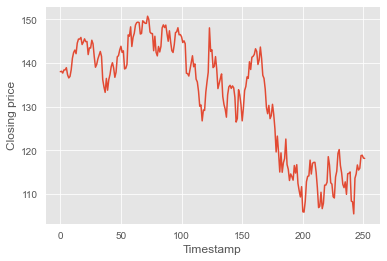

In [20]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [21]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

120
30


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [22]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
3/3 [==============================] - 11s 2s/step - loss: 0.0164 - mse: 0.0164 - mae: 0.1061 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0869
Epoch 2/40
3/3 [==============================] - 0s 45ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0779 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0582
Epoch 3/40
3/3 [==============================] - 0s 47ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0639 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0680
Epoch 4/40
3/3 [==============================] - 0s 40ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0610 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0537
Epoch 5/40
3/3 [==============================] - 0s 53ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0516 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0534
Epoch 6/40
3/3 [==============================] - 0s 53ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0491 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0508
Epoch 7/40
3/3 [===================

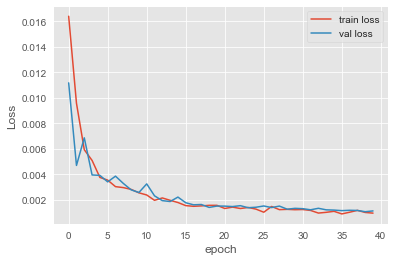

In [23]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

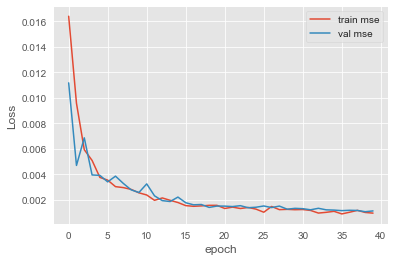

In [24]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

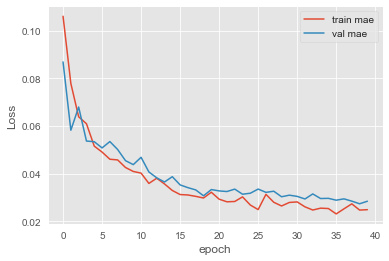

In [25]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [26]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [27]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 39ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0285


[0.0011477447114884853, 0.0011477447114884853, 0.02846725843846798]

In [28]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.826571
R2 Score: 0.826571
Max Error: 0.074949


1/1 [==============================] - 0s 31ms/step


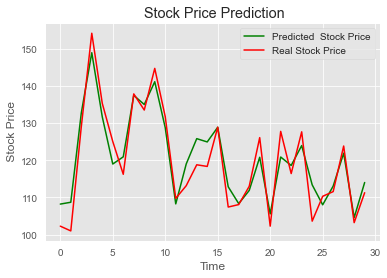

In [29]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

# EDA